<div>
Olá, Maikon!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a> <br>
    Olá Luiz, obrigado pela revisão. <br> Refiz as correções, mas mantive alguns gráficos (Fiquei em dúvida se tirava ou não). <br> Me avise se está correto e se precisa de mais alguma correção, por favor!
</div>

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>

# Otimização de Despesas de Marketing da Y.Afisha
---
## 📌 Sumário
1. Importação e Preparação dos Dados.
2. Análise de Produto.
3. Análise de Vendas.
4. Análise de Marketing.
5. Conclusão e Recomendações.


### <a name="importacao"></a>🔍 1. Importação e Preparação dos Dados

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

# Configurações
sns.set(style='whitegrid')
%matplotlib inline

# Carregando os dados
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

### <a name="produto"></a>📈 2. Análise de Produto

#### 2.1 - Preparando os dados de Visitas

In [34]:
print("Análise Inicial dos dados: VISITS\n")
print(visits.dtypes)
print(visits.head(10), "\n")

print("Análise Inicial dos dados: ORDERS\n")
print(orders.dtypes)
print(orders.head(10), "\n")

print("Análise Inicial dos dados: COSTS\n")
print(costs.dtypes)
print(costs.head(10), "\n")


Análise Inicial dos dados: VISITS

Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  161746

In [35]:
# Renomear colunas para formato padronizado
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')

# Converter colunas de data/hora
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])

# Criar colunas auxiliares
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.isocalendar().week
visits['month'] = visits['start_ts'].dt.to_period('M')

# Calcular duração da sessão em minutos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60


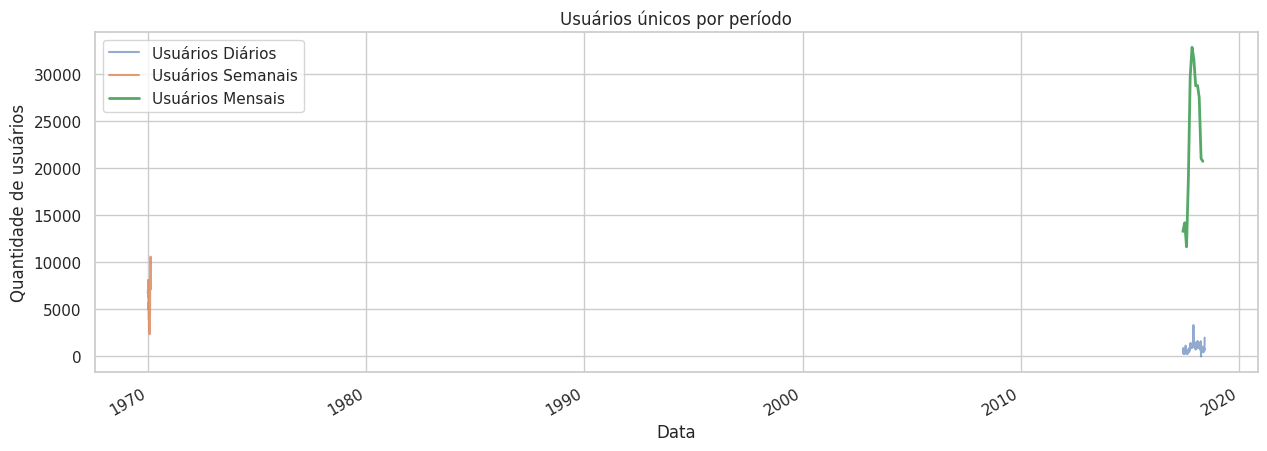

In [36]:
# Usuários únicos por período
daily_users = visits.groupby('date')['uid'].nunique()
weekly_users = visits.groupby('week')['uid'].nunique()
monthly_users = visits.groupby('month')['uid'].nunique()

# Plotando
plt.figure(figsize=(15, 5))
daily_users.plot(label='Usuários Diários', alpha=0.6)
weekly_users.plot(label='Usuários Semanais', alpha=0.8)
monthly_users.plot(label='Usuários Mensais', linewidth=2)
plt.title('Usuários únicos por período')
plt.xlabel('Data')
plt.ylabel('Quantidade de usuários')
plt.legend()
plt.grid(True)
plt.show()


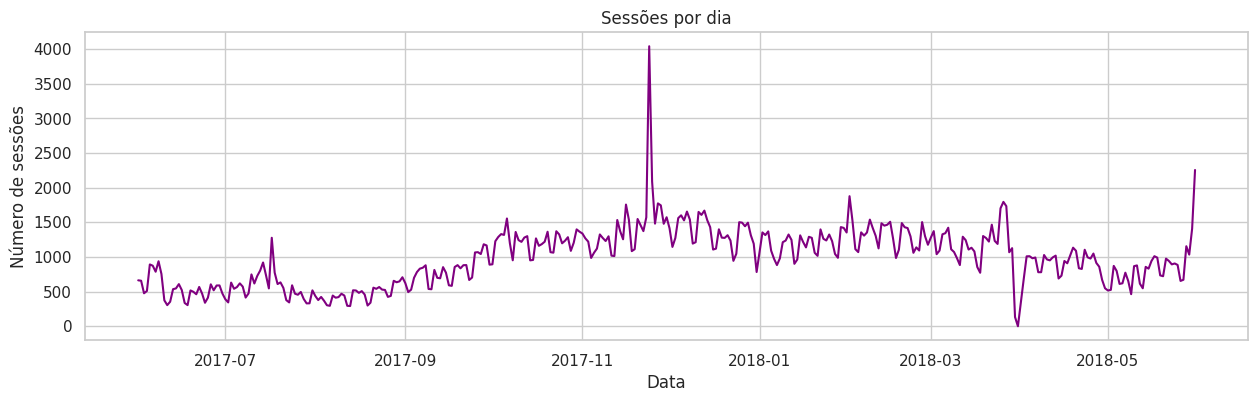

In [37]:
sessions_per_day = visits.groupby('date')['uid'].count()

plt.figure(figsize=(15, 4))
sessions_per_day.plot(color='purple')
plt.title('Sessões por dia')
plt.xlabel('Data')
plt.ylabel('Número de sessões')
plt.grid(True)
plt.show()


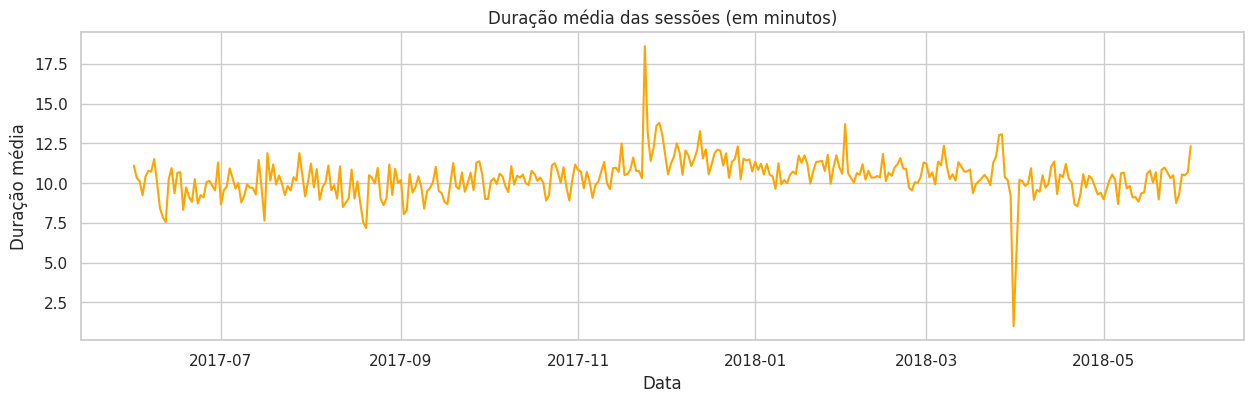

In [38]:
avg_session_duration = visits.groupby('date')['session_duration'].mean()

plt.figure(figsize=(15, 4))
avg_session_duration.plot(color='orange')
plt.title('Duração média das sessões (em minutos)')
plt.xlabel('Data')
plt.ylabel('Duração média')
plt.grid(True)
plt.show()


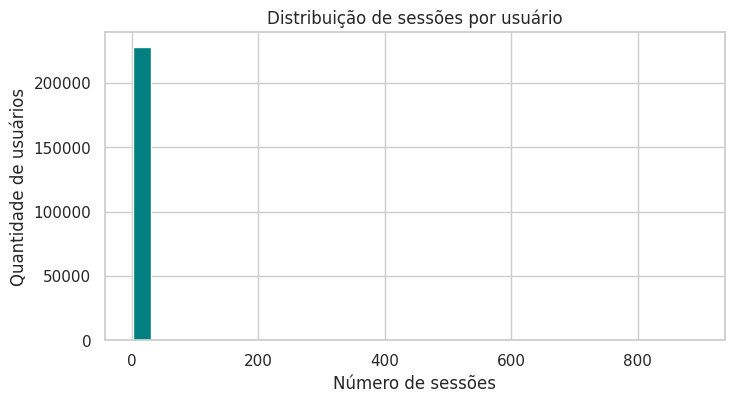

Média de sessões por usuário: 1.58


In [39]:
# Número de sessões por usuário
sessions_per_user = visits.groupby('uid')['start_ts'].count()

# Histograma
plt.figure(figsize=(8, 4))
sessions_per_user.hist(bins=30, color='teal')
plt.title('Distribuição de sessões por usuário')
plt.xlabel('Número de sessões')
plt.ylabel('Quantidade de usuários')
plt.grid(True)
plt.show()

# Média de sessões
print('Média de sessões por usuário:', round(sessions_per_user.mean(), 2))


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- As estatísticas de acessos foram analisadas
- A duração das sessões foi calculada. Bom trabalho plotando a distribuição da duração das sessoes!
- As conclusões foram apresentadas
</div>

#### 2.2 Preparando os dados de Vendas

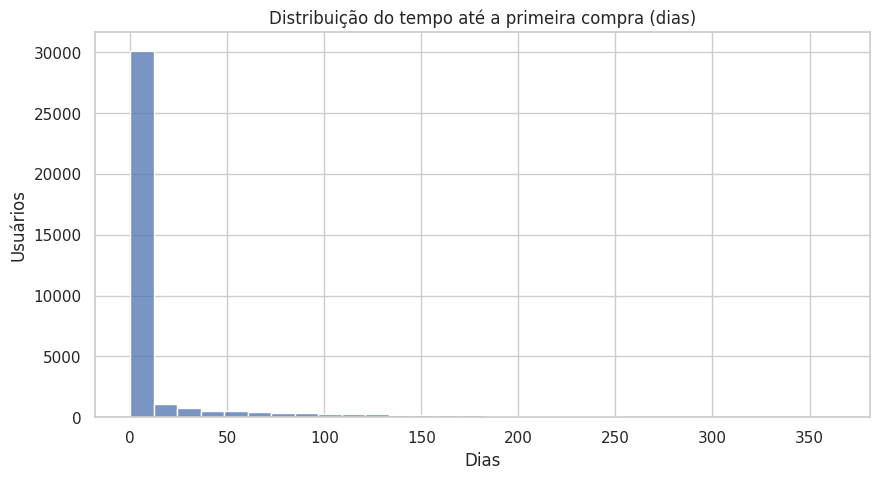

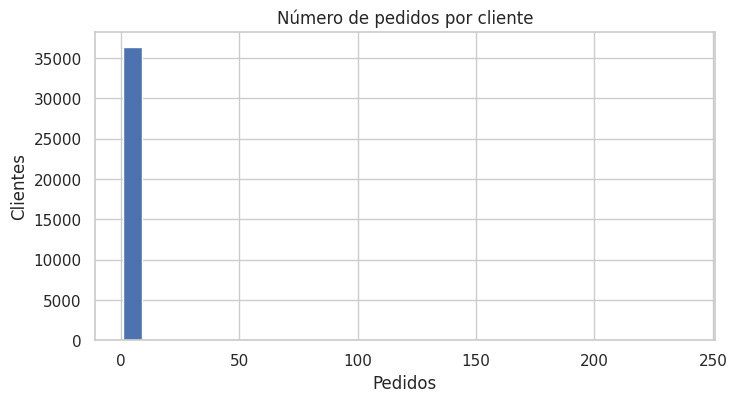

Valor médio por pedido: $5.00


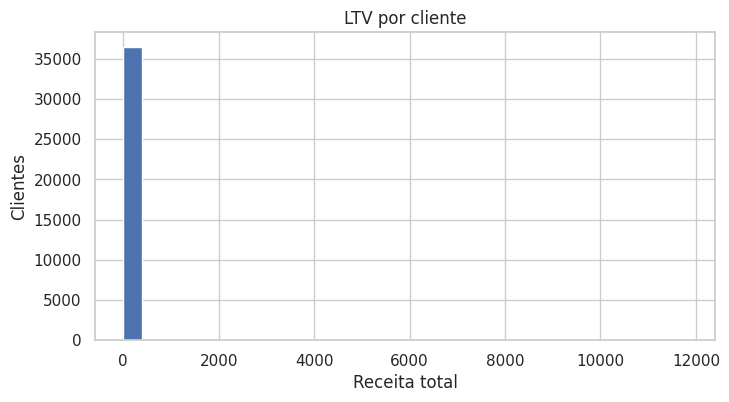

LTV médio: $6.90


In [40]:
# Padronizar colunas
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

# Data do primeiro pedido por usuário
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_buy_ts']

# Data do primeiro acesso
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid', 'first_visit_ts']

# Calcular tempo até primeira compra
user_lifecycle = first_visits.merge(first_orders, on='uid', how='left')
user_lifecycle['days_to_first_purchase'] = (user_lifecycle['first_buy_ts'] - user_lifecycle['first_visit_ts']).dt.days
user_lifecycle['days_to_first_purchase'] = user_lifecycle['days_to_first_purchase'].fillna(-1)

# Distribuição de dias até primeira compra
plt.figure(figsize=(10, 5))
sns.histplot(user_lifecycle[user_lifecycle['days_to_first_purchase'] >= 0]['days_to_first_purchase'], bins=30)
plt.title('Distribuição do tempo até a primeira compra (dias)')
plt.xlabel('Dias')
plt.ylabel('Usuários')
plt.grid(True)
plt.show()

# Pedidos por usuário
orders_per_user = orders.groupby('uid')['buy_ts'].count()
plt.figure(figsize=(8, 4))
orders_per_user.hist(bins=30)
plt.title('Número de pedidos por cliente')
plt.xlabel('Pedidos')
plt.ylabel('Clientes')
plt.grid(True)
plt.show()

# Valor médio por pedido
average_order_value = orders['revenue'].mean()
print(f'Valor médio por pedido: ${average_order_value:.2f}')

# LTV por cliente
ltv = orders.groupby('uid')['revenue'].sum()
ltv.hist(bins=30, figsize=(8, 4))
plt.title('LTV por cliente')
plt.xlabel('Receita total')
plt.ylabel('Clientes')
plt.grid(True)
plt.show()
print(f'LTV médio: ${ltv.mean():.2f}')

#### Retenção de Clientes

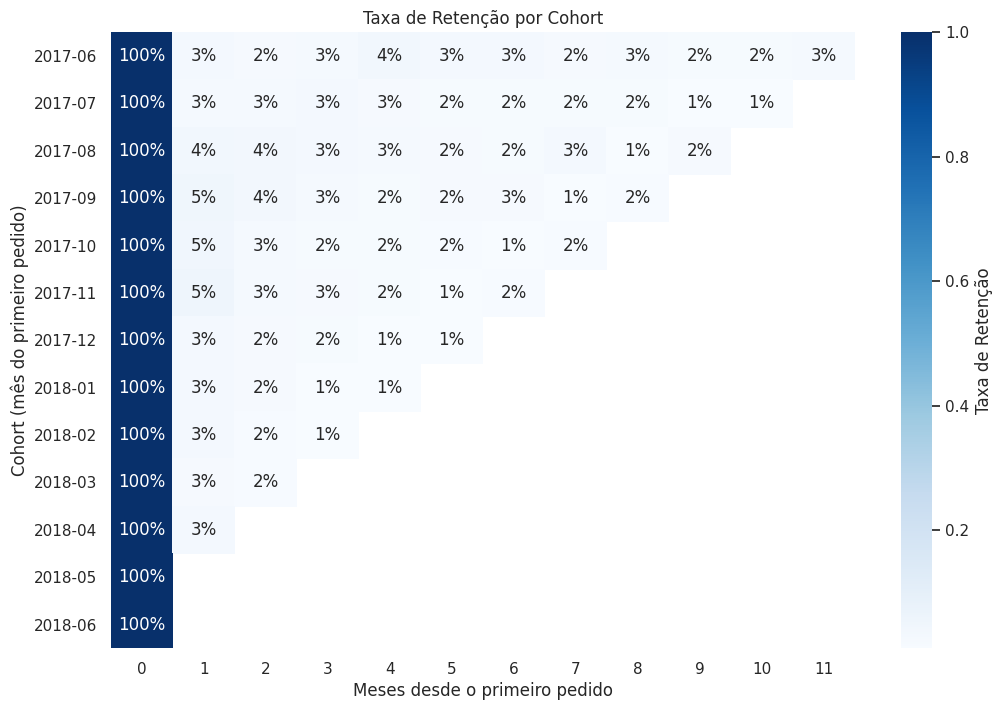

In [41]:
# 1. Criar coluna 'first_buy_ts' com a data do primeiro pedido por usuário
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index()
first_orders.columns = ['uid', 'first_buy_ts']

# 2. Criar coluna 'cohort' com mês/ano da primeira compra (periodo mensal)
first_orders['cohort'] = first_orders['first_buy_ts'].dt.to_period('M')

# 3. Adicionar coluna 'cohort' no dataframe orders, via merge
orders = orders.merge(first_orders[['uid', 'cohort']], on='uid', how='left')

# 4. Criar coluna 'order_period' com mês/ano do pedido
orders['order_period'] = orders['buy_ts'].dt.to_period('M')

# 5. Calcular diferença em meses entre order_period e cohort
orders['cohort_index'] = (orders['order_period'] - orders['cohort']).apply(lambda x: x.n)

# 6. Calcular tamanho do cohort (usuários únicos no mês 0)
cohort_sizes = orders[orders['cohort_index'] == 0].groupby('cohort')['uid'].nunique()

# 7. Contar usuários únicos por cohort e cohort_index
cohort_counts = orders.groupby(['cohort', 'cohort_index'])['uid'].nunique().reset_index()

# 8. Calcular taxa de retenção
cohort_counts = cohort_counts.merge(cohort_sizes.rename('cohort_size'), on='cohort')
cohort_counts['retention_rate'] = cohort_counts['uid'] / cohort_counts['cohort_size']

# 9. Criar pivot table para heatmap
retention_pivot = cohort_counts.pivot(index='cohort', columns='cohort_index', values='retention_rate')

# 10. Plotar heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt='.0%', cmap='Blues', cbar_kws={'label': 'Taxa de Retenção'})
plt.title('Taxa de Retenção por Cohort')
plt.xlabel('Meses desde o primeiro pedido')
plt.ylabel('Cohort (mês do primeiro pedido)')
plt.show()

#### 2.3 Preparando os dados de Marketing

Total gasto com marketing: $329131.62
   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49
   source_id      costs  clients_count        cac
0          3  141321.63           9138  15.465269
1          4   61073.60           9823   6.217408
2          5   51757.10           6839   7.567934
3          2   42806.04           4323   9.901929
4          1   20833.27           3743   5.565928
5         10    5822.49           1241   4.691773
6          9    5517.49           1415   3.899286
   source_id      costs   revenue  clients_count        cac       roi
0          3  141321.63  44317.68           9138  15.465269 -0.686406
1          4   61073.60  52479.75           9823   6.217408 -0.140713
2          5   51757.10  40357.91           6839   7.567934 -0.220244
3          2   42806.04  65152.26           4323   9.901929  0.522034
4          1   20833

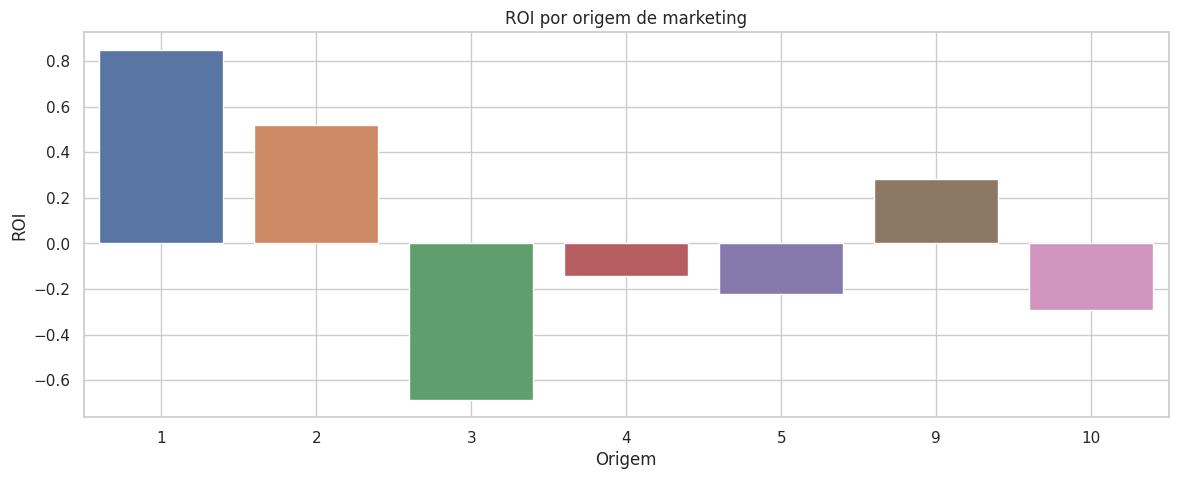

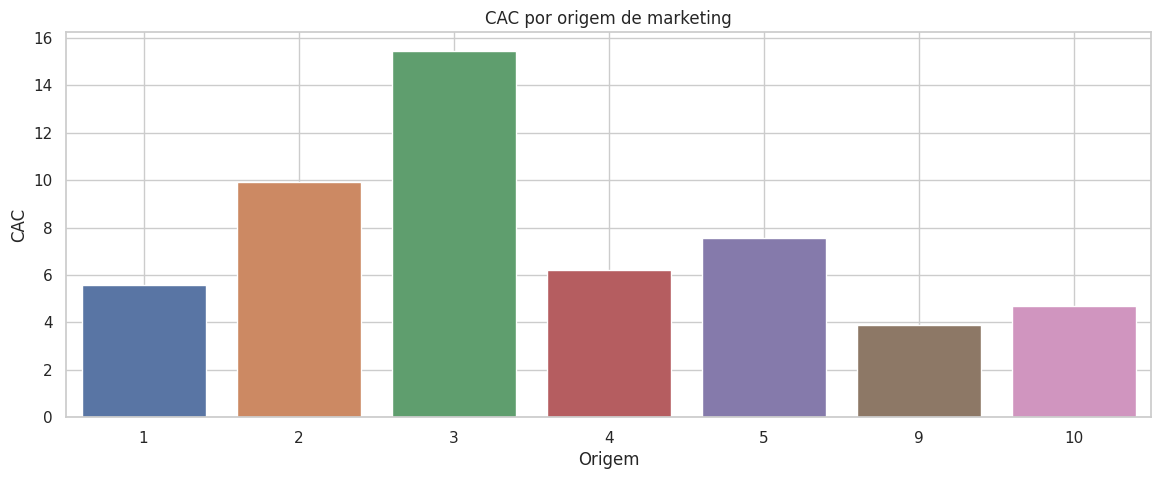

In [42]:

# --- Preparar dados ---

# Padronizar colunas e converter datas em costs
costs.columns = costs.columns.str.lower().str.replace(' ', '_')
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.to_period('M')

# Total gasto e gasto por origem
total_cost = costs['costs'].sum()
print(f'Total gasto com marketing: ${total_cost:.2f}')
cost_per_source = costs.groupby('source_id')['costs'].sum().reset_index().sort_values(by='costs', ascending=False)
print(cost_per_source)

# Extrair a origem da primeira visita do usuário (source da aquisição)
first_source = visits.groupby('uid')['source_id'].first().reset_index()

# Filtrar compradores e associar origem de aquisição
buyers = orders['uid'].unique()
buyers_sources = first_source[first_source['uid'].isin(buyers)]

# Calcular CAC por source: custo total / quantidade de clientes adquiridos
clients_per_source = buyers_sources.groupby('source_id')['uid'].nunique().reset_index()
clients_per_source.columns = ['source_id', 'clients_count']
cac = cost_per_source.merge(clients_per_source, on='source_id', how='left')
cac['cac'] = cac['costs'] / cac['clients_count']

print(cac)

# Receita total por origem - associar source aos pedidos via buyers_sources
orders_with_source = orders.merge(buyers_sources, on='uid', how='left')
revenue_per_source = orders_with_source.groupby('source_id')['revenue'].sum().reset_index()

# Calcular ROI: (Receita - Custos) / Custos
roi_df = cac.merge(revenue_per_source, on='source_id', how='left')
roi_df['roi'] = (roi_df['revenue'] - roi_df['costs']) / roi_df['costs']

print(roi_df[['source_id', 'costs', 'revenue', 'clients_count', 'cac', 'roi']])

# --- Visualizações ---

plt.figure(figsize=(14, 5))
sns.barplot(data=roi_df.sort_values('roi', ascending=False), x='source_id', y='roi')
plt.title('ROI por origem de marketing')
plt.xlabel('Origem')
plt.ylabel('ROI')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 5))
sns.barplot(data=roi_df.sort_values('cac'), x='source_id', y='cac')
plt.title('CAC por origem de marketing')
plt.xlabel('Origem')
plt.ylabel('CAC')
plt.grid(True)
plt.show()


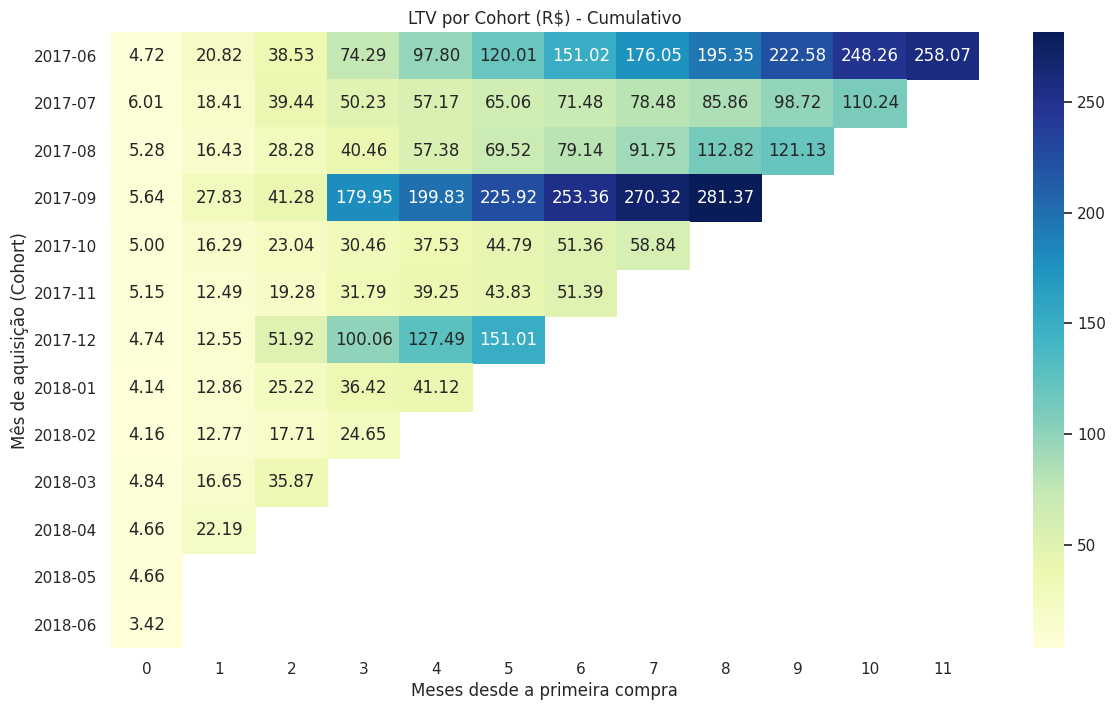

In [44]:
# --- Cálculo de LTV por Cohort ---

# Padronizar colunas e converter datas
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders['month'] = orders['buy_ts'].dt.to_period('M')

# 1. Data do primeiro pedido por usuário
first_orders = orders.groupby('uid')['buy_ts'].min().reset_index().rename(columns={'buy_ts': 'first_purchase'})
first_orders['first_order_month'] = first_orders['first_purchase'].dt.to_period('M')

# 2. Associar com a origem da aquisição
buyers_sources = first_orders.merge(first_source, on='uid', how='left')

# 3. Receita mensal por usuário
user_revenue = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index()

# 4. Combinar receita com dados de aquisição
buyers_data = buyers_sources.merge(user_revenue, on='uid')

# 5. Calcular idade do cliente (nº de meses desde a primeira compra)
buyers_data['age'] = (buyers_data['month'] - buyers_data['first_order_month']).apply(lambda x: x.n)

# 6. Calcular LTV (aqui usamos a própria receita do cliente como base)
buyers_data['ltv'] = buyers_data['revenue']  # se quiser considerar margem, aplique aqui

# 7. Gerar tabela com LTV médio por cohort e idade
ltv_cohort = buyers_data.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
).cumsum(axis=1).round(2)

# --- Heatmap do LTV por Cohort ---

plt.figure(figsize=(14, 8))
sns.heatmap(ltv_cohort, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('LTV por Cohort (R$) - Cumulativo')
plt.xlabel('Meses desde a primeira compra')
plt.ylabel('Mês de aquisição (Cohort)')
plt.show()



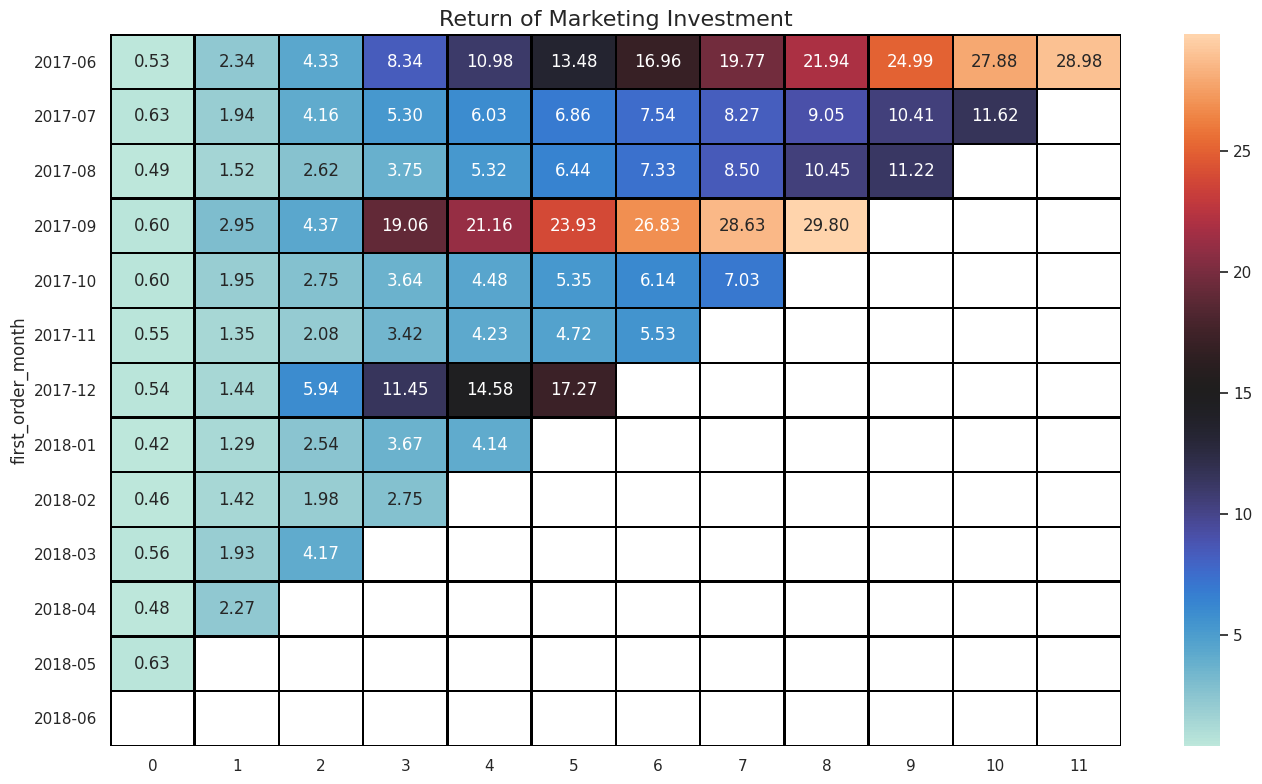

In [47]:
# --- Preparar dados acumulados de ROMI por cohort e idade (0 a 11) ---

# LTV acumulado por cohort e age
ltv_matrix = buyers_data.pivot_table(
    index='first_order_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
).cumsum(axis=1)

# CAC por cohort
cohort_cac_df = buyers_data[['first_order_month', 'uid']].drop_duplicates()
cohort_clients = cohort_cac_df.groupby('first_order_month')['uid'].count().reset_index()
cohort_costs = costs.groupby(costs['dt'].dt.to_period('M'))['costs'].sum().reset_index()
cohort_costs.columns = ['first_order_month', 'costs']
cohort_cac = cohort_clients.merge(cohort_costs, on='first_order_month', how='left')
cohort_cac['cac'] = cohort_cac['costs'] / cohort_cac['uid']

# Merge para calcular ROMI acumulado
romi_matrix = ltv_matrix.copy()
for month in romi_matrix.index:
    cac_value = cohort_cac.loc[cohort_cac['first_order_month'] == month, 'cac'].values[0]
    romi_matrix.loc[month] = romi_matrix.loc[month] / cac_value

romi_matrix = romi_matrix.round(2)

# --- Gerar heatmap cumulativo do ROMI por cohort ---

plt.figure(figsize=(14, 8))
sns.heatmap(romi_matrix, annot=True, fmt='.2f', cmap='icefire', linewidths=1, linecolor='black')
plt.title('Return of Marketing Investment', fontsize=16)
plt.xlabel('')
plt.ylabel('first_order_month')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## ✅ 3. Conclusão e Recomendações  <a name="conclusao"></a>

Com base na análise, as seguintes recomendações podem ser feitas para a equipe de marketing da Y.Afisha:

- **Otimizar investimentos nas origens com maior ROI**, mesmo que tenham CAC moderado, pois estão gerando mais receita em relação ao custo.
- **Evitar fontes com CAC elevado e ROI negativo**, pois indicam desperdício de verba publicitária.
- **Monitorar os canais com ROI estável ao longo do tempo**, ajustando o investimento conforme desempenho sazonal.

As métricas principais usadas foram:

- **CAC (Custo de Aquisição de Cliente)**: avalia quanto custa conquistar um cliente.
- **ROI (Retorno sobre Investimento)**: mede a eficiência de cada canal.
- **LTV (Valor do Tempo de Vida do Cliente)**: indica o valor total que um cliente traz para a empresa.

Essas métricas ajudam a tomar decisões mais assertivas sobre alocação de recursos em marketing.